# Evaluating Noise Reduction Techniques for Sleep Audio Analysis

This notebook demonstrates a batch-processing workflow for evaluating various noise reduction techniques on biomedical sleep audio data. It includes audio preparation, denoising, apnea event detection, and quantitative evaluation (sensitivity, precision, F1 score).

## 1. Setup & Requirements
Install and import all required libraries.

In [1]:
# Install required packages
# !pip install numpy pandas librosa soundfile matplotlib torchaudio speechbrain df-enhnace
import os
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio, display

## 2. Data Overview
Describe and visualize the available clean, noisy, and real-world sleep audio data.

In [3]:
# Example: List available clean and noisy audio files
clean_dir = '../tests/raw/'
noisy_dir = '../tests/noisy'
clean_files = sorted([f for f in os.listdir(clean_dir) if f.endswith('.wav')])
noisy_files = sorted([f for f in os.listdir(noisy_dir) if f.endswith('.wav')])
print('Clean files:', clean_files[:3])
print('Noisy files:', noisy_files[:3])

Clean files: ['raw_1_20s.wav', 'raw_2_62s.wav', 'raw_3_30s.wav']
Noisy files: ['mixed_raw_1_20s.wav', 'mixed_raw_2_62s.wav', 'mixed_raw_3_30s.wav']


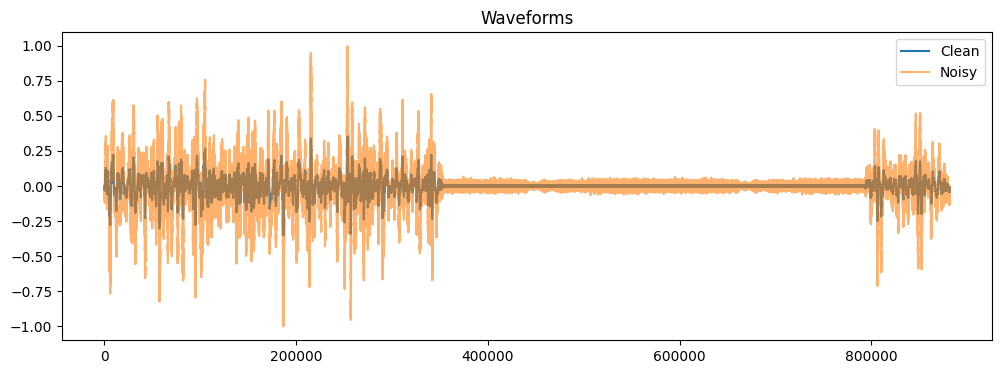

In [4]:
# Visualize and play a sample clean and noisy audio
sample_clean = os.path.join(clean_dir, clean_files[0])
sample_noisy = os.path.join(noisy_dir, noisy_files[0])
y_clean, sr = librosa.load(sample_clean, sr=None)
y_noisy, _ = librosa.load(sample_noisy, sr=sr)
plt.figure(figsize=(12, 4))
plt.plot(y_clean, label='Clean')
plt.plot(y_noisy, alpha=0.6, label='Noisy')
plt.legend(); plt.title('Waveforms'); plt.show()
display(Audio(y_clean, rate=sr))
display(Audio(y_noisy, rate=sr))

## 3. Audio Preparation
Replicate, augment, and inject noise/apnea events in batch.

In [ ]:
# Example: Replicate and mix audio in batch (using your scripts)
# !python src/replicate_audio.py --input <input.wav> --output <output.wav> --factor 2
# !python src/combining_audio.py -cl <clean.wav> -n <noise.wav> -out <mixed.wav> -nl 0.2
# !python src/apnea_injector.py --input <in.wav> --output <out.wav> --apnea_duration 10 --event_starts 5,30

## 4. Noise Reduction Techniques
Apply each denoising method in batch. Visualize and play before/after.

In [17]:
# Example: Spectral Subtraction (batch)
#!python ../src/spec_subtraction_same_file.py --input ../tests/noisy --output ../tests/denoised/spectral_subtraction
# Example: Wiener Filtering (batch)
#!python ../src/wiener_filtering.py --input ../tests/noisy --output ../tests/denoised/wiener
# Example: LogMMSE (batch)
#!python ../src/log_mmse.py --input ../tests/noisy --output ../tests/denoised/logmmse
# Example: DeepFilterNet (batch)
#!python ../src/denoise_with_deepfilternet.py --input ../tests/noisy/ --output ../tests/denoised/deepfilternet
# Example: SpeechBrain/MetricGAN (single file)
!python ../src/neural_1_speechbrain.py --input ../tests/noisy/ --output ../tests/denoised/speechbrain

Processing ../tests/noisy/mixed_raw_2_62s.wav -> ../tests/denoised/speechbrain/mixed_raw_2_62s.wav
Processing ../tests/noisy/mixed_raw_1_20s.wav -> ../tests/denoised/speechbrain/mixed_raw_1_20s.wav
Processing ../tests/noisy/mixed_raw_1_20s.wav -> ../tests/denoised/speechbrain/mixed_raw_1_20s.wav
Processing ../tests/noisy/mixed_raw_3_30s.wav -> ../tests/denoised/speechbrain/mixed_raw_3_30s.wav
Processing ../tests/noisy/mixed_raw_3_30s.wav -> ../tests/denoised/speechbrain/mixed_raw_3_30s.wav


### Denoising Results Visualization
Compare the effectiveness of different denoising methods visually and auditorily.

In [ ]:
# Visualize and play denoised audio
denoised_dir = 'tests/denoised/spectral_subtraction'
denoised_files = sorted([f for f in os.listdir(denoised_dir) if f.endswith('.wav')])
sample_denoised = os.path.join(denoised_dir, denoised_files[0])
y_denoised, _ = librosa.load(sample_denoised, sr=sr)
plt.figure(figsize=(12, 4))
plt.plot(y_noisy, label='Noisy')
plt.plot(y_denoised, alpha=0.7, label='Denoised')
plt.legend(); plt.title('Denoising Result'); plt.show()
display(Audio(y_denoised, rate=sr))

## 5. Apnea Event Detection
Detect apnea events in denoised audio (batch).

In [20]:
# Example: Run apnea detection in batch
!python ../src/apnea_detector.py --dir ../tests/denoised/spectral_subtraction --output_csv ../tests/denoised/spectral_subtraction/output.csv
!python ../src/apnea_detector.py --dir ../tests/denoised/deepfilternet/ --output_csv ../tests/denoised/deepfilternet/output.csv
!python ../src/apnea_detector.py --dir ../tests/denoised/speechbrain --output_csv ../tests/denoised/speechbrain/output.csv
!python ../src/apnea_detector.py --dir ../tests/denoised/wiener --output_csv ../tests/denoised/wiener/output.csv
!python ../src/apnea_detector.py --dir ../tests/denoised/logmmse --output_csv ../tests/denoised/logmmse/output.csv

../tests/denoised/spectral_subtraction/denoised_mixed_raw_2_62s.wav: Detected apnea events (start, end in seconds): [(0, 20), (21, 37), (38, 48)]
../tests/denoised/spectral_subtraction/denoised_mixed_raw_3_30s.wav: Detected apnea events (start, end in seconds): [(0, 30)]
../tests/denoised/spectral_subtraction/denoised_mixed_raw_1_20s.wav: Detected apnea events (start, end in seconds): [(0, 20)]
Apnea events saved to ../tests/denoised/spectral_subtraction/output.csv
../tests/denoised/deepfilternet/denoised_mixed_raw_2_62s.wav: Detected apnea events (start, end in seconds): [(0, 20), (21, 32), (36, 48)]
../tests/denoised/deepfilternet/denoised_mixed_raw_3_30s.wav: Detected apnea events (start, end in seconds): [(0, 30)]
../tests/denoised/deepfilternet/denoised_mixed_raw_1_20s.wav: Detected apnea events (start, end in seconds): [(0, 20)]
Apnea events saved to ../tests/denoised/deepfilternet/output.csv
../tests/denoised/deepfilternet/denoised_mixed_raw_2_62s.wav: Detected apnea events (sta

## 6. Evaluation Metrics
Compute sensitivity, precision, and F1 score for each method.

Running consolidated evaluation...
Found 5 methods: ['logmmse', 'spectral_subtraction', 'deepfilternet', 'wiener', 'speechbrain']
Evaluating logmmse...
  TP=1, FP=2, FN=4
  Sensitivity=0.200, Precision=0.333, F1=0.250
Evaluating spectral_subtraction...
  TP=4, FP=1, FN=1
  Sensitivity=0.800, Precision=0.800, F1=0.800
Evaluating deepfilternet...
  TP=4, FP=1, FN=1
  Sensitivity=0.800, Precision=0.800, F1=0.800
Evaluating wiener...
  TP=4, FP=1, FN=1
  Sensitivity=0.800, Precision=0.800, F1=0.800
Evaluating speechbrain...
  TP=1, FP=2, FN=4
  Sensitivity=0.200, Precision=0.333, F1=0.250
Results saved to: ../results/evaluation_results.csv
NOISE REDUCTION METHOD EVALUATION SUMMARY
Number of methods evaluated: 5
Best F1 Score: 0.800
Average F1 Score: 0.580

DETAILED RESULTS:
------------------------------------------------------------
              Method  TP  FP  FN  Sensitivity  Precision  F1_Score
spectral_subtraction   4   1   1        0.800      0.800     0.800
              wiener   4

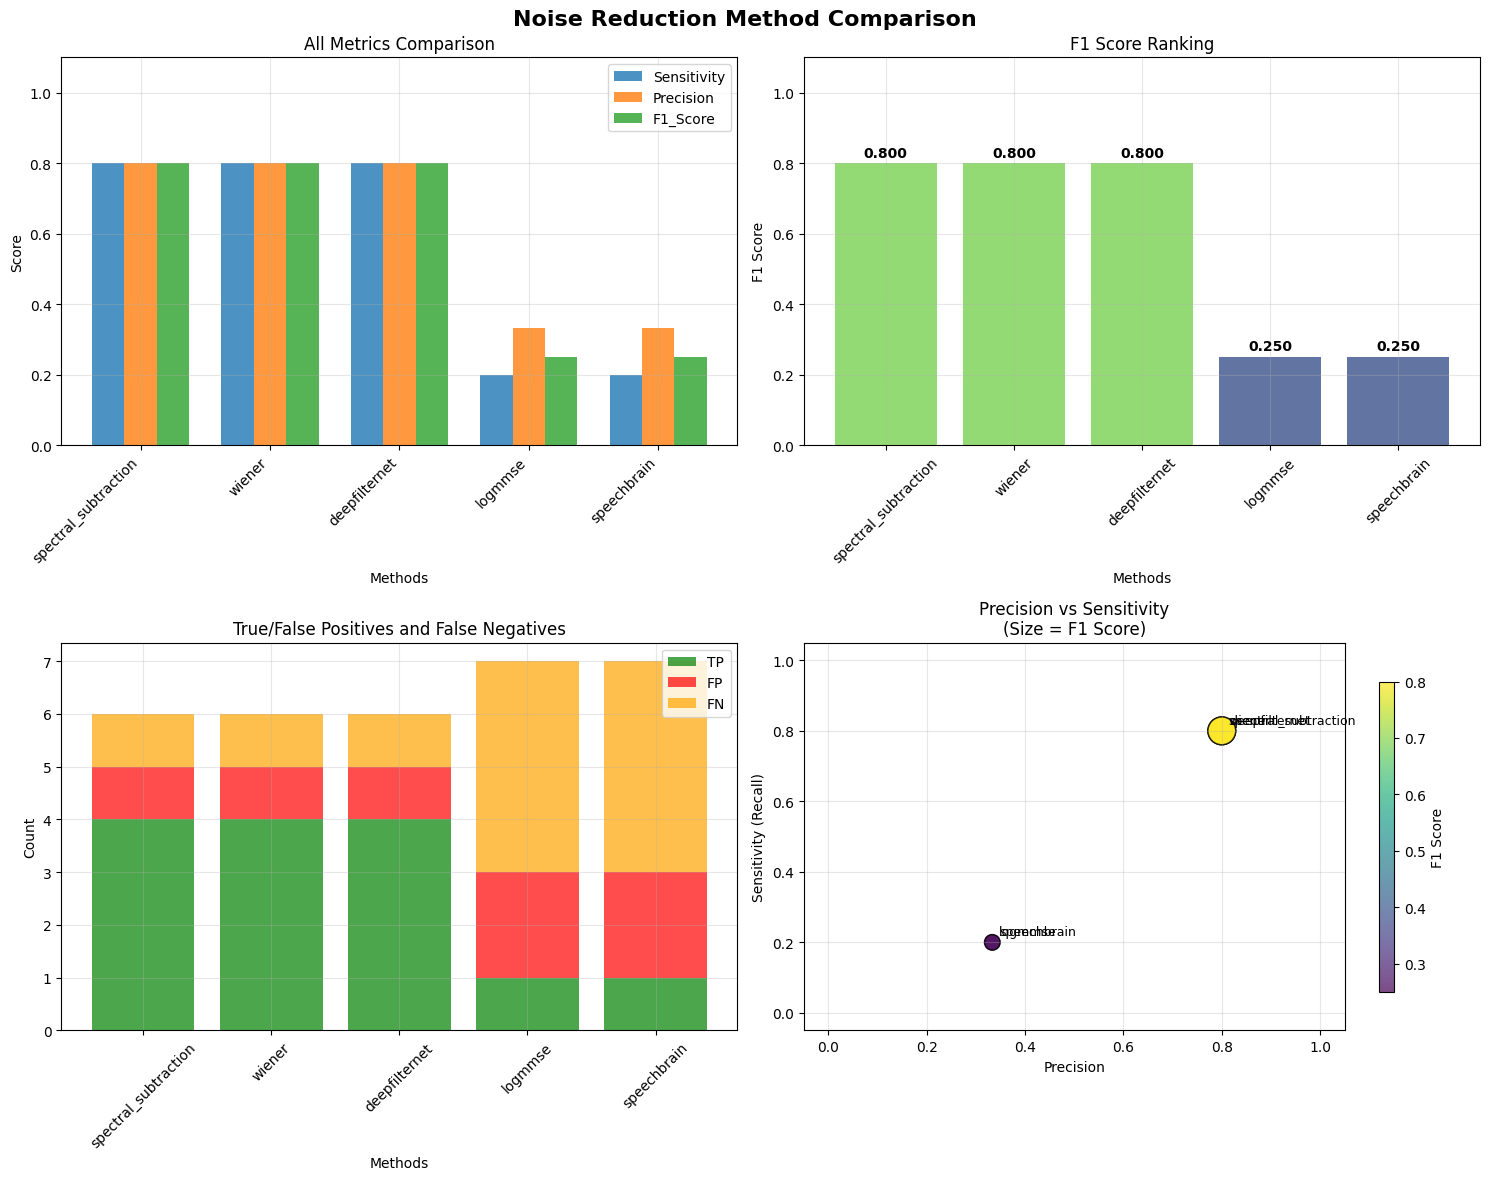

In [4]:
# Unified evaluation of all noise reduction methods
import sys
sys.path.append('../src')
from evaluation_utils import quick_evaluate

# Run comprehensive evaluation of all methods
results_df = quick_evaluate(
    ground_csv="../tests/raw/output.csv",
    denoised_dir="../tests/denoised", 
    save_results=True
)

# Results are automatically displayed with:
# - Summary statistics
# - Detailed comparison table  
# - Comprehensive visualizations
# - Saved to CSV for further analysis

## 7. Visualization & Comparison
Visualize and compare results (metrics, waveforms, spectrograms, audio).

In [ ]:
# Additional custom visualizations using the results DataFrame
import matplotlib.pyplot as plt

# Create custom plots if needed
if 'results_df' in locals() and not results_df.empty:
    
    # Custom F1 Score comparison
    plt.figure(figsize=(10, 6))
    bars = plt.bar(results_df['Method'], results_df['F1_Score'], 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'][:len(results_df)])
    plt.xlabel('Noise Reduction Method')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison Across All Methods')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, score in zip(bars, results_df['F1_Score']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Display top 3 methods
    print("\nTop 3 Methods:")
    print(results_df.head(3)[['Method', 'F1_Score', 'Sensitivity', 'Precision']].to_string(index=False))
    
else:
    print("No evaluation results available. Please run the evaluation first.")

## 8. Summary & Discussion
Summarize findings, compare methods, and discuss strengths/weaknesses.

In [6]:
# Optional: Evaluate individual methods or use custom parameters
from evaluation_utils import run_consolidated_evaluation, plot_comparison_metrics

# Example: Run evaluation with different overlap threshold
custom_results = run_consolidated_evaluation(
    ground_csv="../tests/raw/output.csv",
    denoised_dir="../tests/denoised",
    overlap_thresh=0.3  # More lenient matching
)

if not custom_results.empty:
    print("\nResults with 30% overlap threshold:")
    print(custom_results[['Method', 'F1_Score', 'Sensitivity', 'Precision']].to_string(index=False))

# Example: Load previously saved results
# saved_results = pd.read_csv("../results/evaluation_results.csv")
# plot_comparison_metrics(saved_results, title="Saved Evaluation Results")

Running consolidated evaluation...
Found 5 methods: ['logmmse', 'spectral_subtraction', 'deepfilternet', 'wiener', 'speechbrain']
Evaluating logmmse...
  TP=2, FP=1, FN=3
  Sensitivity=0.400, Precision=0.667, F1=0.500
Evaluating spectral_subtraction...
  TP=5, FP=0, FN=0
  Sensitivity=1.000, Precision=1.000, F1=1.000
Evaluating deepfilternet...
  TP=5, FP=0, FN=0
  Sensitivity=1.000, Precision=1.000, F1=1.000
Evaluating wiener...
  TP=5, FP=0, FN=0
  Sensitivity=1.000, Precision=1.000, F1=1.000
Evaluating speechbrain...
  TP=2, FP=1, FN=3
  Sensitivity=0.400, Precision=0.667, F1=0.500

Results with 30% overlap threshold:
              Method  F1_Score  Sensitivity  Precision
spectral_subtraction     1.000        1.000      1.000
              wiener     1.000        1.000      1.000
       deepfilternet     1.000        1.000      1.000
             logmmse     0.500        0.400      0.667
         speechbrain     0.500        0.400      0.667
